<a href="https://colab.research.google.com/github/ti-sanjid/Introduction-to-netCDF/blob/main/Introduction_to_netCDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is NetCdf??
NetCDF (Network Commnon Data Form) is a file format for storing and sharing data, particularly climate and oceanographic data. It was developed by the Unidata Program Center at University Corporation for Atmospheric Research(UCAR) in the 1980s.


# NetCDF Data Model



The netCDF data model  is based on three major components:



*  Variables 
*  Dimensions
*  Attributes


This way of thinking about data was introduced with the very first netCDF release, and is still the core of all netCDF files.

In version 4.0, the netCDF data model has been expanded which is known as `The Enhanced Data Model`.But we are going to talk about the classic data model in this article which is also the core of the new enhanced data model.


<img src='https://drive.google.com/uc?id=1Y-C3fsTq0L053uNtM4mo7Rjxb2cE7aP0' width="" height="600">

## Dimensions
Dimensions define the size and the shape of the data arrays.Each dimension is given a name,a length, and a tag indicating whether it is an unlimited dimension,which can be expanded to accommodate new data without rewriting the entire file.We can see the above diagram to better understanding.

For example, a NetCDF file containing temperature data might have dimensions named `latitude`, `longitude`, and `time`, each with a specific length. The temperature variable in the file could then be defined with a shape of (time, latitude, longitude), meaning that it is a 3-dimensional array with its size along each dimension defined by the length of the corresponding dimension in the file.


## Variables
Variables are used to store multidimensional arrays of data in a NetCDF file. Each variable is given a name, a data type, a shape (defined by one or more dimensions), and a set of attributes that describe the data. 

In NetCDF, the shape of a variable refers to the dimensions that define the size of the variable's array. The shape is a tuple that specifies the length of each dimension in the array. For example, a variable representing temperature values measured at different locations and times might have a shape of (time, location).

Variables can also have a special attribute called `_FillValue`, which indicates missing or undefined data.


For example, a NetCDF file containing temperature data might have a variable representing temperature values measured at different lattitudes,longitudes and times  with a shape of (time, latitude, longitude). This means that the variable contains a 3-dimensional array of temperature values, with its size along each dimension defined by the length of the corresponding dimension in the file.



## Attributes

Attributes are used to store metadata about the data in a NetCDF file. Each attribute is given a name and a value, which can be a scalar, a one-dimensional array, or a multidimensional array. Attributes can be attached to dimensions, variables, or the global attributes of the file itself. 

For example, a NetCDF file might have attributes describing the units of the variables, the source of the data, the processing steps that were applied, or other relevant information.




Together, dimensions, variables, and attributes form the basic building blocks of the NetCDF data model. By using these components, NetCDF files can store and organize complex scientific data sets in a way that is platform-independent, flexible, and efficient.



Here's an example to illustrate the relationship between these three concepts:

Suppose we want to store daily temperature data for a year at different locations on the Earth's surface. we might use the following NetCDF structure:
```
Dimension: `time` (length = 365)
Dimension: `lat` (length = 180)
Dimension: `lon` (length = 360)
Variable: `time` (type = float64, shape = `(time,)`) - stores the time values
Variable: `lat` (type = float32, shape = `(lat,)`) - stores the latitude values
Variable: `lon` (type = float32, shape = `(lon,)`) - stores the longitude values
Variable: `temperature` (type = float32, shape = `(time, lat, lon)`) - stores the temperature values

```
In this example, time, lat, and lon are the dimensions that define the shape of the temperature variable. The temperature variable stores the actual temperature data as a three-dimensional array, and the time, lat, and lon variables store the values that correspond to each dimension. The dimensions and variables can also have attributes, such as units or long names, to provide additional information about the data.

## What is NetCDF then? 
NetCDF views the world of scientific data in the same way that an atmospheric scientist might: as sets of related arrays. There are various physical quantities (such as pressure and temperature) located at points at a particular latitude, longitude, vertical level, and time.

A scientist might also like to store supporting information, such as the units, or some information about how the data were produced.

The axis information (latitude, longitude, level, and time) would be stored as netCDF dimensions. Dimensions have a length and a name.

The physical quantities (pressure, temperature) would be stored as netCDF variables. Variables are N-dimensional arrays of data, with a name and an associated set of netCDF dimensions.

It is also common to include one variable for each dimension in order to keep the values along that axis consistent. These variables are called **“coordinate variables.”** The latitude coordinate variable would be a one-dimensional variable (with latitude as its dimension), and it would hold the latitude values at each point along the axis.

The additional bits of metadata would be stored as netCDF attributes.

Attributes are always single values or one-dimensional arrays. (This works out well for a string, which is a one-dimensional array of ASCII characters.)

Source: https://docs.unidata.ucar.edu/netcdf-c/current/netcdf_data_model.html#met_example

## Multidimensional geographic data

Temperature is a good example of multidimensional geographic data.


Let's suppose temperature is depending on X (Latitude),Y (Longitude) and Time.

<img src='https://drive.google.com/uc?id=1iCQYLcmKmgZOBGXMabXCqYx5uTmRTl1O' width="300" height="">




We can say that temperauture depending on three dimensions.So we will get different values of temperature for any change in one of these dimensions.That's why we get different values in diagram below-

<img src='https://drive.google.com/uc?id=10BiKL0SGIGq68zle5V_IGv4rG3WUjSJD' width="500" height="">




## Why do we use netcdf?

NetCDF is usually used to store multidimensional geographic data.






Some examples of these data are temperature,pressure,humidity,precipitation,wind speed and direction.Variables stored in NetCDF are often measured multiple times per day over large areas.With multiple measurements per day, data values accumulate quickly and become unwieldy to work with. When each value is also assigned to a geographic location, data management is further complicated. NetCDF provides a solution for these challenges.


NetCDF is a self-describing file format that can store data fields as well as the relevant "metadata", or `information about the contents of the file`.

**Metadata** - Important information describing the data contained in netCDF files which is embedded directly in the netCDF file.Types of metadata include descriptive names, units, horizontal and vertical, coordinates, file creation date/time, file history, etc.

NetCDF data is:

* Self-Describing. A netCDF file includes information about the data it contains.
* Portable. A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.
* Scalable. A small subset of a large dataset may be accessed efficiently.
* Appendable. Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
* Sharable. One writer and multiple readers may simultaneously access the same netCDF file.
* Archivable. Access to all earlier forms of netCDF data will be supported by current and future versions of the software.


# Creating a NetCDF file.
In this section we'll attempt to create and write a NetCDF file for temperature and pressure.

In [ ]:
import netCDF4 as nc
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# create a new NetCDF file
ncfile = nc.Dataset('temperature_pressure.nc','w')

# define the dimensions of the data
time = ncfile.createDimension('time', None)
lat = ncfile.createDimension('lat', 10)
lon = ncfile.createDimension('lon', 10)

# create variables for the data and set their attributes
times = ncfile.createVariable('time', np.float64, ('time',))
times.units = 'days since 2022-01-01 00:00:00'
times.long_name = 'Time'
lats = ncfile.createVariable('lat', np.float32, ('lat',))
lats.units = 'degrees_north'
lats.long_name = 'Latitude'
lons = ncfile.createVariable('lon', np.float32, ('lon',))
lons.units = 'degrees_east'
lons.long_name = 'Longitude'
temp = ncfile.createVariable('temperature', np.float32, ('time', 'lat', 'lon',))
temp.units = 'Celsius'
temp.long_name = 'Temperature'
pres = ncfile.createVariable('pressure', np.float32, ('time', 'lat', 'lon',))
pres.units = 'hPa'
pres.long_name = 'Pressure'

# create some fake temperature and pressure data to write to the file
num_times = 5
num_lats = 10
num_lons = 10
times_data = np.arange(num_times)
lats_data = np.linspace(-90, 90, num_lats)
lons_data = np.linspace(-180, 180, num_lons)
temp_data = np.random.randint(-30, 40, (num_times, num_lats, num_lons))
pres_data = np.random.randint(900, 1100, (num_times, num_lats, num_lons))

# write the data to the variables in the NetCDF file
times[:] = times_data
lats[:] = lats_data
lons[:] = lons_data
temp[:] = temp_data
pres[:] = pres_data

# set metadata for the NetCDF file
ncfile.title = 'Temperature and Pressure Data'
ncfile.history = 'Created on February 15, 2023'
ncfile.source = 'Generated by Python script'
 
# close the NetCDF file
ncfile.close()

In this example, we create a new NetCDF file called temperature_pressure.nc and define the dimensions of the data: `time`, `lat`, and `lon`. We then create variables for each dimension and the temperature and pressure data, and set their attributes, such as units.

Next, we create some fake temperature and pressure data to write to the file: 5 time steps, 10 latitudes, and 10 longitudes, with random temperature values between -30 and 40 Celsius, and random pressure values between 900 and 1100 hPa. Finally, we write the data to the variables in the NetCDF file using the `[:]` syntax to assign the entire array at once.

In this example, we use the long_name attribute to provide descriptive metadata for each variable, and the title, history, and source attributes to add metadata to the NetCDF file as a whole.

When the above code is run, a new NetCDF file will be created with the specified dimensions and variables, and the fake temperature and pressure data will be written to the file. The file can then be shared or analyzed using NetCDF libraries in other software programs.

## Exploring dimensions, variable, and attributes in a NetCDF file.

### Dimension information
In this section, we'll write some code to see the dimensions of the netcdf file we've prepared before.

In [ ]:
ncfile = nc.Dataset('temperature_pressure.nc', 'r')

# Print the names and sizes of the dimensions
for dimname, dimobj in ncfile.dimensions.items():
    print(dimname, len(dimobj))

time 5
lat 10
lon 10


### Variable information
In this section, we'll write some code to determine the variables of the netcdf file we've prepared before.

In [ ]:
ncfile = nc.Dataset('temperature_pressure.nc', 'r')

# Print the names and shapes of the variables
for varname, varobj in ncfile.variables.items():
    print(varname, varobj.shape)

time (5,)
lat (10,)
lon (10,)
temperature (5, 10, 10)
pressure (5, 10, 10)


### To list the attributes of a variable in a NetCDF file
The code below will print the names and values of all attributes of the `temperature `variable in the file

In [ ]:
# Open the NetCDF file
ncfile = nc.Dataset('temperature_pressure.nc', 'r')

# Access a variable and print its attributes
temp_var = ncfile.variables['temperature']
for attrname in temp_var.ncattrs():
    print(attrname, '=', getattr(temp_var, attrname))

units = Celsius
long_name = Temperature


The code below will print the names and values of all attributes of the `pressure` variable in the file.

In [ ]:
# Open the NetCDF file
ncfile = nc.Dataset('temperature_pressure.nc', 'r')

# Access a variable and print its attributes
temp_var = ncfile.variables['pressure']
for attrname in temp_var.ncattrs():
    print(attrname, '=', getattr(temp_var, attrname))

units = hPa
long_name = Pressure


## How to read the values of a variable.

To read the pressure values from the NetCDF file, we can use the `variables` attribute of the `Dataset` object in the netCDF4 package, which returns a dictionary-like object containing the variables in the NetCDF file. Here is some sample code that demonstrates how to read the pressure values:

In [ ]:
import netCDF4 as nc

# Open the NetCDF file
nc_file = nc.Dataset('temperature_pressure.nc')

# Get the pressure variable
pressure = nc_file.variables['pressure'][:]

# Close the NetCDF file
nc_file.close()

# Print the pressure values
print(pressure)

[[[ 951.  958. 1001. 1058. 1093. 1047.  920. 1088. 1068.  947.]
  [1034. 1024.  986. 1035. 1088. 1074. 1035. 1067. 1012.  978.]
  [ 981.  931.  956.  933.  970.  948. 1035. 1051.  980. 1006.]
  [ 992. 1012.  903.  950.  909. 1056. 1002. 1069. 1086.  989.]
  [1037.  911.  932.  967.  935.  931.  988. 1065. 1032. 1037.]
  [1048.  910.  975.  946. 1017. 1015.  911. 1081.  988.  998.]
  [1065.  966. 1088.  947. 1086. 1057.  938.  911.  980. 1090.]
  [1034. 1074. 1003. 1004.  939.  993. 1043.  924.  913.  965.]
  [ 957. 1000.  966.  975. 1050. 1029. 1054.  987.  999. 1060.]
  [1050.  963.  975.  972. 1052.  957. 1076. 1036.  945. 1036.]]

 [[ 953. 1014.  925.  911. 1056.  979.  957. 1018.  917.  906.]
  [ 943. 1065.  996. 1043.  949.  918. 1035. 1077. 1030. 1038.]
  [ 931. 1052. 1022.  916. 1000. 1005. 1037.  919. 1064.  939.]
  [1084. 1044.  933. 1077. 1060.  932. 1084.  918.  937.  924.]
  [1014. 1014.  926. 1010. 1063. 1044.  942. 1078.  930.  929.]
  [1098.  987. 1045. 1078.  912.  907.

We can print a specific part of values of a variable.

In [ ]:

import netCDF4 as nc

# Open the NetCDF file
nc_file = nc.Dataset('temperature_pressure.nc')

# Get the pressure variable
pressure = nc_file.variables['pressure'][:]

# Read a subset of the pressure values
subset = pressure[0:3,0:5,0:5]  # First part for time,second part for lat and third part for lon.

# Close the NetCDF file
nc_file.close()

# Print the subset of pressure values
print(subset)

[[[ 951.  958. 1001. 1058. 1093.]
  [1034. 1024.  986. 1035. 1088.]
  [ 981.  931.  956.  933.  970.]
  [ 992. 1012.  903.  950.  909.]
  [1037.  911.  932.  967.  935.]]

 [[ 953. 1014.  925.  911. 1056.]
  [ 943. 1065.  996. 1043.  949.]
  [ 931. 1052. 1022.  916. 1000.]
  [1084. 1044.  933. 1077. 1060.]
  [1014. 1014.  926. 1010. 1063.]]

 [[ 947.  908.  994.  964.  944.]
  [1061. 1083. 1008.  967.  994.]
  [ 964. 1055. 1059. 1088. 1032.]
  [1015.  913.  988. 1086. 1034.]
  [ 936.  926. 1023.  960.  952.]]]


To extract the values of a variable for a specific dimension, we can use NumPy's array indexing and slicing functionality.

In [ ]:
import netCDF4 as nc
import numpy as np

# Open the netCDF file
nc_file = nc.Dataset('temperature_pressure.nc', 'r')

# Get the time dimension index you're interested in
time_index = 0

# Extract the temperature values for the specified time index
temperature_slice = nc_file.variables['temperature'][time_index, :, :]

# to print the values temperature.
print(temperature_slice)

# Close the netCDF file
nc_file.close()

[[ 12. -24.  -4.  20.   0.  36. -25.  -7.  38. -21.]
 [-10.  16.   6.  22. -24.   5. -18.  -9.   0.  36.]
 [ 33.  23.  15.  31.  -7.  39. -11.  -5.   7. -19.]
 [ -5.  23. -10.  12.  -2.  12.  23.  27.  31. -20.]
 [-25.   9.  25. -14.  38. -29.  32.  37.  20.   8.]
 [  5.  -4.  11. -11. -11. -17.  -8.  21.   7.  13.]
 [-29.  -4.  29.  -5. -28.  21. -20.  27.  -7.  18.]
 [ 39.  19. -19.   3.  25. -11. -23.  25. -30. -26.]
 [ 19. -23.  29.  31.   5.   8. -10. -27.  25. -19.]
 [ 21.  18.  26.   3.  27.  39. -23. -28.  19. -11.]]


## ncdump
`ncdump` is a command line.It is used to exibits the metadata and data of a netCDF file so that we humans can read the file easily.Basically,it is used to show the contents of netCDF files.It's useful for browsing data.



ncdump has a lots of options:

```
ncdump [-c|-h] [-v ...] [-k] [-t] [-s] [-b lang] [-f lang]
       [-l len] [-n name] [-p fdig[,ddig]] [-x] file.nc

  [-c]               Coordinate variable data and header information
  [-h]               Header information only, no data
  [-v var1[,...]]    Data for variable(s) var1,... only
  [-k]               Output kind of netCDF file
  [-t]               Output time data as ISO date-time strings

  [-s]               Output special (virtual) attributes
  [-b [c|f]]         Brief annotations for C or Fortran indices in data
  [-f [c|f]]         Full annotations for C or Fortran indices in data
  [-l len]           Line length maximum in data section (default 80)
  [-n name]          Name for netCDF (default derived from file name)
  [-p n[,n]]         Display floating-point values with less precision
  [-x]               Output NcML instead of CDL (netCDF-3 files only)

  file.nc            Name of netCDF file
```
reference:https://www.unidata.ucar.edu/software/netcdf/workshops/2011/utilities/Ncdump.html

**To install the ncdump command line tool on the system we need to use the following code cell.**

In [ ]:
!apt-get install netcdf-bin
!apt-get install libnetcdf-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  netcdf-bin
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 191 kB of archives.
After this operation, 563 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 netcdf-bin amd64 1:4.7.3-1 [191 kB]
Fetched 191 kB in 0s (1,076 kB/s)
Selecting previously unselected package netcdf-bin.
(Reading database ... 128208 files and directories currently installed.)
Preparing to unpack .../netcdf-bin_1%3a4.7.3-1_amd64.deb ...
Unpacking netcdf-bin (1:4.7.3-1) ...
Setting up netcdf-bin (1:4.7.3-1) ...
Processing triggers for man-db (2.9.1-1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libnetcdf-dev is already the newest version (1:4.7.3-1).
libnetcdf-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 19 n

## Let's try to use it on the netcdf file `temperature_pressure.nc` we have created above.



In [ ]:
!ncdump -ct temperature_pressure.nc

netcdf temperature_pressure {
dimensions:
	time = UNLIMITED ; // (5 currently)
	lat = 10 ;
	lon = 10 ;
variables:
	double time(time) ;
		time:units = "days since 2022-01-01 00:00:00" ;
		time:long_name = "Time" ;
	float lat(lat) ;
		lat:units = "degrees_north" ;
		lat:long_name = "Latitude" ;
	float lon(lon) ;
		lon:units = "degrees_east" ;
		lon:long_name = "Longitude" ;
	float temperature(time, lat, lon) ;
		temperature:units = "Celsius" ;
		temperature:long_name = "Temperature" ;
	float pressure(time, lat, lon) ;
		pressure:units = "hPa" ;
		pressure:long_name = "Pressure" ;

// global attributes:
		:title = "Temperature and Pressure Data" ;
		:history = "Created on February 15, 2023" ;
		:source = "Generated by Python script" ;
data:

 time = "2022-01-01", "2022-01-02", "2022-01-03", "2022-01-04", "2022-01-05" ;

 lat = -90, -70, -50, -30, -10, 10, 30, 50, 70, 90 ;

 lon = -180, -140, -100, -60, -20, 20, 60, 100, 140, 180 ;
}


**Let's try it on a random netCDF file that are obtained from observations by different organizations.**

We are using colab here.

Firstly,we need to upload the file on the drive>colab notebooks folder.
Then we need to mount the drive in colab.

We can do it manualy by clicking on the folder button that appears on the left side line in colab,then clicking on the drive button on the top.

Or, we can use the the following code in a cell:
```
from google.colab import drive
drive.mount('/content/drive')
```

navigate to the directory containing the netcdf file.For example:
```
%cd /content/drive/MyDrive/data
```

Then we can use the `ncdump`:
```
!ncdump -h my_netcdf_file.nc
```

In [ ]:
# As I have mounted manually
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#  Navigating to folder that contains the netCDF file.
%cd /content/drive/MyDrive/Colab Notebooks/NetCDF project


/content/drive/MyDrive/Colab Notebooks/NetCDF project


In [ ]:
!ncdump -ct sresa1b_ncar_ccsm3-example.nc

netcdf sresa1b_ncar_ccsm3-example {
dimensions:
	lat = 128 ;
	lon = 256 ;
	bnds = 2 ;
	plev = 17 ;
	time = UNLIMITED ; // (1 currently)
variables:
	float area(lat, lon) ;
		area:long_name = "Surface area" ;
		area:units = "meter2" ;
	float lat(lat) ;
		lat:long_name = "latitude" ;
		lat:units = "degrees_north" ;
		lat:axis = "Y" ;
		lat:standard_name = "latitude" ;
		lat:bounds = "lat_bnds" ;
	double lat_bnds(lat, bnds) ;
	float lon(lon) ;
		lon:long_name = "longitude" ;
		lon:units = "degrees_east" ;
		lon:axis = "X" ;
		lon:standard_name = "longitude" ;
		lon:bounds = "lon_bnds" ;
	double lon_bnds(lon, bnds) ;
	int msk_rgn(lat, lon) ;
		msk_rgn:long_name = "Mask region" ;
		msk_rgn:units = "bool" ;
	double plev(plev) ;
		plev:long_name = "pressure" ;
		plev:units = "Pa" ;
		plev:standard_name = "air_pressure" ;
		plev:positive = "down" ;
		plev:axis = "Z" ;
	float pr(time, lat, lon) ;
		pr:comment = "Created using NCL code CCSM_atmm_2cf.ncl on\n",
			" machine eagle163s" ;
		pr:missi

In [ ]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (7.2.1-1~focal0).
proj-bin is already the newest version (7.2.1-1~focal0).
proj-data is already the newest version (7.2.1-1~focal0).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.9.1-1~focal0).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
E: Unable to locate package python-cartopy
Found existing installation: Shapely 1.8.5.post1
Uninstalling Shapely-1.8.5.post1:
  Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/col

ValueError: ignored

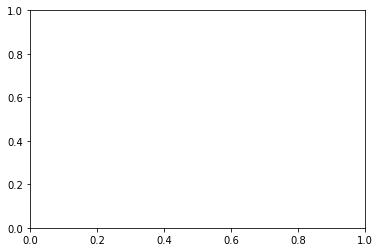

In [ ]:
# Import necessary libraries
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load NetCDF file
ds = xr.open_dataset('/content/drive/MyDrive/Colab Notebooks/NetCDF project/sresa1b_ncar_ccsm3-example.nc')

# Extract temperature data variable from the dataset
temp = ds['tas']

# Extract latitude and longitude coordinates from the dataset
lat = ds['lat']
lon = ds['lon']

# Create a meshgrid of latitude and longitude coordinates
lon_mesh, lat_mesh = np.meshgrid(lon, lat)

# Plot the temperature data using pcolormesh function
plt.pcolormesh(lon_mesh, lat_mesh, temp)
plt.colorbar()
plt.show()

In [ ]:


!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (7.2.1-1~focal0).
libproj-dev set to manually installed.
proj-data is already the newest version (7.2.1-1~focal0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 170 kB of archives.
After this operation, 485 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal/main amd64 proj-bin amd64 7.2.1-1~focal0 [170 kB]
Fetched 170 kB in 0s (395 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 128208 files and directories currently installed.)
Preparing to unpack .../proj-bin_7.2.1-1~focal0_amd64.deb ...
Unpacking proj-bin (7.2.1-1~focal0) ...
Setting up proj-bin (7.2.1-1~focal0) ...
Processing triggers for man-db (2.9.1-1) ...
Reading package lists... Done
Building

ValueError: ignored

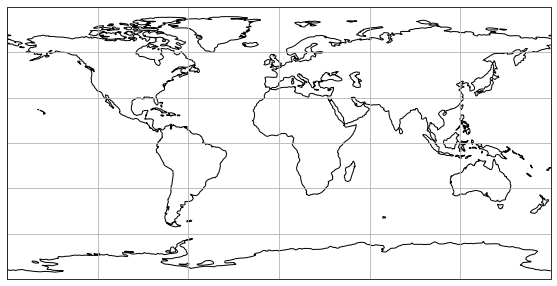

In [ ]:
import warnings 
warnings. filterwarnings("ignore")


import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Load NetCDF file
ds = xr.open_dataset('/content/drive/MyDrive/Colab Notebooks/NetCDF project/sresa1b_ncar_ccsm3-example.nc')

# Extract temperature data variable from the dataset
temp = ds['tas']

# Extract latitude and longitude coordinates from the dataset
lat = ds['lat']
lon = ds['lon']

# Create a figure and axis object with Cartopy projection
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and gridlines to the plot
ax.coastlines()
ax.gridlines()

# Plot the temperature data using pcolormesh function
im = ax.pcolormesh(lon, lat, temp, transform=ccrs.PlateCarree())

# Add a color bar to the plot
cbar = plt.colorbar(im)

# Add a title to the plot
plt.title('Temperature')

# Show the plot
plt.show()

## 2011 Unidata NetCDF Workshop
https://www.unidata.ucar.edu/software/netcdf/workshops/2011/index.html